# Graph Isomorphism Networks: Theoretical Foundations and Practical Power
## Understanding the Most Expressive Graph Neural Networks

Graph Isomorphism Networks (GINs) represent a theoretical breakthrough in graph neural networks, achieving **maximum discriminative power** among the message-passing GNN family. Unlike other GNNs that may fail to distinguish certain graph structures, GINs are provably as powerful as the Weisfeiler-Lehman graph isomorphism test.

### 🎯 Why GINs Matter:

**Theoretical Guarantee**: GINs can distinguish any pair of graphs that the WL-test can distinguish  
**Optimal Expressiveness**: No message-passing GNN can be more powerful than GIN  
**Practical Performance**: State-of-the-art results on graph classification tasks  
**Mathematical Elegance**: Simple architecture with profound theoretical implications

In this notebook, we'll explore the mathematical foundations of GINs and demonstrate their superior expressive power through interactive visualizations and practical implementations.

def create_gin_expressiveness_animation():
    """
    Creates visualization showing the expressiveness of different GNN architectures
    """
    import networkx as nx
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create two graphs that look different but may be confused by weaker GNNs
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('🧠 GIN vs Other GNNs: Distinguishing Power Comparison', fontsize=16, fontweight='bold')
    
    # Create two non-isomorphic graphs that have same node counts and similar structure
    G1 = nx.Graph()
    G1.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)])  # Square with diagonal
    
    G2 = nx.Graph()
    G2.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (1, 3)])  # Square with different diagonal
    
    pos1 = {0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (0, 1)}
    pos2 = {0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (0, 1)}
    
    # Graph 1
    ax = axes[0, 0]
    nx.draw(G1, pos1, with_labels=True, node_color='lightblue', 
            node_size=1000, font_size=14, font_weight='bold', ax=ax, edge_color='blue', width=2)
    ax.set_title('Graph A\nSquare + Diagonal (0,2)', fontsize=12, fontweight='bold')
    
    # Graph 2
    ax = axes[0, 1]
    nx.draw(G2, pos2, with_labels=True, node_color='lightcoral', 
            node_size=1000, font_size=14, font_weight='bold', ax=ax, edge_color='red', width=2)
    ax.set_title('Graph B\nSquare + Diagonal (1,3)', fontsize=12, fontweight='bold')
    
    # Node degree comparison
    ax = axes[0, 2]
    degrees1 = [G1.degree(n) for n in G1.nodes()]
    degrees2 = [G2.degree(n) for n in G2.nodes()]
    
    x = np.arange(4)
    width = 0.35
    ax.bar(x - width/2, degrees1, width, label='Graph A', color='lightblue', alpha=0.8)
    ax.bar(x + width/2, degrees2, width, label='Graph B', color='lightcoral', alpha=0.8)
    ax.set_title('Node Degrees\nSame degree sequence!', fontsize=12, fontweight='bold')
    ax.set_xlabel('Node')
    ax.set_ylabel('Degree')
    ax.legend()
    ax.set_xticks(x)
    
    # Simulated GCN response (cannot distinguish)
    ax = axes[1, 0]
    # GCN might produce similar embeddings due to symmetric aggregation
    np.random.seed(42)
    gcn_emb1 = np.random.normal(0, 1, (4, 2))
    gcn_emb2 = gcn_emb1 + np.random.normal(0, 0.1, (4, 2))  # Very similar
    
    ax.scatter(gcn_emb1[:, 0], gcn_emb1[:, 1], c='blue', s=100, alpha=0.7, label='Graph A')
    ax.scatter(gcn_emb2[:, 0], gcn_emb2[:, 1], c='red', s=100, alpha=0.7, label='Graph B')
    ax.set_title('❌ GCN Embeddings\nToo similar - cannot distinguish', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Simulated GIN response (can distinguish)
    ax = axes[1, 1]
    # GIN produces more separable embeddings
    gin_emb1 = np.random.normal(-1, 0.3, (4, 2))
    gin_emb2 = np.random.normal(1, 0.3, (4, 2))
    
    ax.scatter(gin_emb1[:, 0], gin_emb1[:, 1], c='blue', s=100, alpha=0.7, label='Graph A')
    ax.scatter(gin_emb2[:, 0], gin_emb2[:, 1], c='red', s=100, alpha=0.7, label='Graph B')
    ax.set_title('✅ GIN Embeddings\nClearly separable!', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Mathematical explanation
    ax = axes[1, 2]
    ax.axis('off')
    
    theory_text = """
    🧮 GIN Mathematical Foundation:
    
    📊 GIN Update Rule:
    h_v^(k+1) = MLP^(k)((1+ε^(k))·h_v^(k) + Σ_{u∈N(v)} h_u^(k))
    
    🎯 Key Insight:
    (1+ε) preserves node's own features
    SUM aggregation is injective
    
    📈 Expressiveness Hierarchy:
    GIN ≥ GraphSAGE ≥ GCN
    
    🔑 Why GIN works:
    • Injective aggregation (SUM)
    • Self-loop emphasis ((1+ε))
    • Universal MLP approximation
    
    💡 WL-Test Connection:
    GIN ≡ WL-test in discriminative power
    """
    
    ax.text(0.05, 0.95, theory_text, transform=ax.transAxes, fontsize=11,
           verticalalignment='top',
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Create WL-test visualization
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle('🔄 Weisfeiler-Lehman Test Iterations', fontsize=14, fontweight='bold')
    
    # Simulate WL iterations
    labels_history = []
    
    # Initial labels (degree)
    labels_history.append({0: 3, 1: 2, 2: 3, 3: 2})  # Graph A degrees
    
    # Iteration 1: hash of (own_label, sorted_neighbor_labels)
    labels_history.append({0: 11, 1: 7, 2: 11, 3: 7})  # After 1 iteration
    
    # Iteration 2: further refinement
    labels_history.append({0: 23, 1: 19, 2: 31, 3: 17})  # After 2 iterations
    
    # Final: stable
    labels_history.append({0: 23, 1: 19, 2: 31, 3: 17})  # Converged
    
    for i, labels in enumerate(labels_history):
        ax = axes[i]
        
        # Color nodes by label
        unique_labels = list(set(labels.values()))
        colors = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))
        node_colors = [colors[unique_labels.index(labels[n])] for n in G1.nodes()]
        
        nx.draw(G1, pos1, with_labels=True, node_color=node_colors,
               node_size=800, font_size=12, font_weight='bold', ax=ax)
        
        ax.set_title(f'WL Iteration {i}\nLabels: {list(labels.values())}', fontsize=10)
        
        # Add label annotations
        for node, (x, y) in pos1.items():
            ax.annotate(f'{labels[node]}', (x, y-0.15), ha='center', 
                       fontsize=9, fontweight='bold',
                       bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Create the GIN expressiveness animation
print("🧠 Understanding GIN Expressiveness and WL-Test Connection")
create_gin_expressiveness_animation()

In [1]:
!pip install torch_geometric;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00


In [2]:
# Comprehensive imports for Graph Isomorphism Networks
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINConv, global_add_pool
from torch_geometric.datasets import Planetoid, TUDataset
from torch_geometric.utils import add_self_loops, degree
from torch_geometric.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import HTML, display

# Environment setup
plt.style.use('default')
%matplotlib inline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'🧠 GIN Computational Device: {device}')
print(f'🎯 Maximum Expressiveness Mode: Activated')

In [3]:
def load_dataset():
    print('..Loading Dataset../n')
    dataset = Planetoid(root = 'data/Cora', name='Cora')
    data = dataset[0]
    print(f'Dataset                   : {dataset}')
    print(f'Number of graphs          : {len(dataset)}')
    print(f'Number of nodes           : {data.x.shape[0]}')
    print(f'Number of edges           : {data.edge_index.shape[1]}')
    print(f'Number of node features   : {data.x.shape[1]}')
    print(f'Number of classes         : {dataset.num_classes}')
    print()
    return data, dataset.num_classes

In [4]:
data, num_classes = load_dataset()

..Loading Dataset../n


Processing...


Dataset                   : Cora()
Number of graphs          : 1
Number of nodes           : 2708
Number of edges           : 10556
Number of node features   : 1433
Number of classes         : 7



Done!


In [5]:
data, num_classes = load_dataset()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

..Loading Dataset../n
Dataset                   : Cora()
Number of graphs          : 1
Number of nodes           : 2708
Number of edges           : 10556
Number of node features   : 1433
Number of classes         : 7



In [6]:
def evaluate_model(model, data):
    model.eval()
    with torch.no_grad():
        embed = model(data.x, data.edge_index).argmax(dim=1)
        test_acc = (embed[data.test_mask] == data.y[test_mask]).float().mean()
        print(f'\nAccuracy on test set : {test_acc:.4f}\n')

In [7]:
def visualize_results(t_l, v_l):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].plot(t_l)
    ax[0].set_title('Training Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].grid(True)

    ax[1].plot(v_l)
    ax[1].set_title('Validation accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

In [8]:
def visualize_embed(model, data, num_classes):
    model.eval()
    with torch.no_grad():
        embed = model(data.x, data.edge_index)
        tsne = TSNE(n_components=2)
        embed_2d = tsne.fit_transform(embed.cpu().numpy())
        plt.figure(figsize=(10, 8))
        colors = plt.cm.Set3(np.linspace(0,1,num_classes))

        for i in range(num_classes):
            mask = data.y.cpu().numpy() == i
            plt.scatter(embed_2d[mask, 0], embed_2d[mask, 1], c = [colors[i]], label=f'Class {i}', alpha=  0.85)
        plt.title('Node Embeddings plotted using Dimensionality reduction (t-sne)')
        plt.legend()
        plt.grid(True, alpha = 0.3)
        plt.show()

def evaluate_model(model, data):
    model.eval()
    with torch.no_grad():
        embed = model(data.x, data.edge_index).argmax(dim=1)
        test_acc = (embed[data.test_mask] == data.y[test_mask]).float().mean()
        print(f'\nAccuracy on test set : {test_acc:.4f}\n')

In [9]:
def train(model, data, epochs=200):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
    loss_fn = nn.CrossEntropyLoss()
    
    model.train()
    train_l = []
    val_accuracy = []
    print("..Training Model..\n")
    for epoch in range(epochs+1):
        optimizer.zero_grad()
        pred = model(data.x, data.edge_index)
        loss = loss_fn(pred[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            pred = model(data.x, data.edge_index).argmax(dim=1)
            val_acc = (pred[data.val_mask] == data.y[data.val_mask]).float().mean()
        model.train()
        train_l.append(loss.item())
        val_accuracy.append(val_acc.item())

        interval = epochs//10
        if epoch%interval == 0:
            print(f'Epoch {epoch}/{epochs},  Loss : {loss:.4f},  Val acc : {val_acc:.4f}')

    print('\n..Training Complete..\n')
    
    return model, train_l, val_accuracy

In [10]:
class mlp(nn.Module):
    def __init__(self, inp_dim, hidden_dim, out_dim, num_layers=3, dropout=0.3):
        super(mlp, self).__init__()
        self.num_layers = num_layers
        self.dropout = dropout
        self.layers = nn.ModuleList()
        self.bn = nn.ModuleList()
        self.layers.append(nn.Linear(inp_dim, hidden_dim))
        self.bn.append(nn.BatchNorm1d(hidden_dim))
        for _ in range(num_layers-2):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))
            self.bn.append(nn.BatchNorm1d(hidden_dim))
        self.layers.append(nn.Linear(hidden_dim, out_dim))
        self.bn.append(nn.BatchNorm1d(hidden_dim))

    def forward(self, x):
        res = None
        for i in range(self.num_layers-1):
            x = self.layers[i](x)
            x = self.bn[i](x)
            x = F.relu(x)
            x = F.dropout(x, self.dropout, training = self.training)
            if res is not None:
                x = x + res
            res = x
        return self.layers[-1](x)

In [11]:
class GINLayer(nn.Module):
    def __init__(self, eps, train=True):
        super(GINLayer, self).__init__()
        if train:
            self.eps = nn.Parameter(torch.tensor(eps))
        else:
            self.register_buffer('eps', torch.tensor(eps, dtype=torch.float32))

    def forward(self, x, edge_index, mlp):
        # x : (N, D)   
        n_feat = mlp(x)    # (N, hidden_dim)
        src, dst = edge_index
        agg = torch.zeros_like(n_feat, device=x.device)
        agg.scatter_add_(0, dst.unsqueeze(-1).expand(-1, n_feat.size(1)), n_feat[src])
        agg = agg + (1+self.eps)*n_feat
        return agg           # (N, hidden_dim)

In [12]:
class GraphIsomorphismModel(nn.Module):
    def __init__(self, inp_dim, hidden_dim, out_dim, num_layers=4, dropout=0.5):
        super(GraphIsomorphismModel, self).__init__()
        self.convs = nn.ModuleList()   # GIN conv layers
        self.mlp_p = nn.ModuleList()   # for transforming aggreadted messages
        self.mlp_f = nn.ModuleList()   # for transforming messages
        self.bn = nn.ModuleList()
        self.num_layers = num_layers
        self.dropout = dropout
        
        self.convs.append(GINLayer(eps=0.0))
        self.bn.append(nn.BatchNorm1d(hidden_dim))
        self.mlp_f.append(mlp(inp_dim, hidden_dim, hidden_dim))
        self.mlp_p.append(mlp(hidden_dim, hidden_dim, hidden_dim))
        
        for _ in range(num_layers-2):
            self.convs.append(GINLayer(eps=0.0))
            self.bn.append(nn.BatchNorm1d(hidden_dim))
            self.mlp_f.append(mlp(hidden_dim, hidden_dim, hidden_dim))
            self.mlp_p.append(mlp(hidden_dim, hidden_dim, hidden_dim))
            
        self.convs.append(GINLayer(eps=0.0))
        self.bn.append(nn.BatchNorm1d(hidden_dim))
        self.mlp_f.append(mlp(hidden_dim, hidden_dim, hidden_dim))
        self.mlp_p.append(mlp(hidden_dim, hidden_dim, out_dim))
        

    def forward(self, x, edge_index):
        res = None
        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index, self.mlp_f[i])
            x = self.mlp_p[i](x)
            if i < self.num_layers-1:
                x = self.bn[i](x)
                x = F.relu(x)
                if res is not None:
                    x = x + res
                x = F.dropout(x, self.dropout, training = self.training)
                
            res = x
        return x

Number of parameter : 1033993

Model Architecture:
GraphIsomorphismModel(
  (convs): ModuleList(
    (0-1): 2 x GINLayer()
  )
  (mlp_p): ModuleList(
    (0): mlp(
      (layers): ModuleList(
        (0-2): 3 x Linear(in_features=256, out_features=256, bias=True)
      )
      (bn): ModuleList(
        (0-2): 3 x BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): mlp(
      (layers): ModuleList(
        (0-1): 2 x Linear(in_features=256, out_features=256, bias=True)
        (2): Linear(in_features=256, out_features=7, bias=True)
      )
      (bn): ModuleList(
        (0-2): 3 x BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (mlp_f): ModuleList(
    (0): mlp(
      (layers): ModuleList(
        (0): Linear(in_features=1433, out_features=256, bias=True)
        (1-2): 2 x Linear(in_features=256, out_features=256, bias=True)
      )
      (bn): ModuleList(
        (0-2): 3 x BatchNo

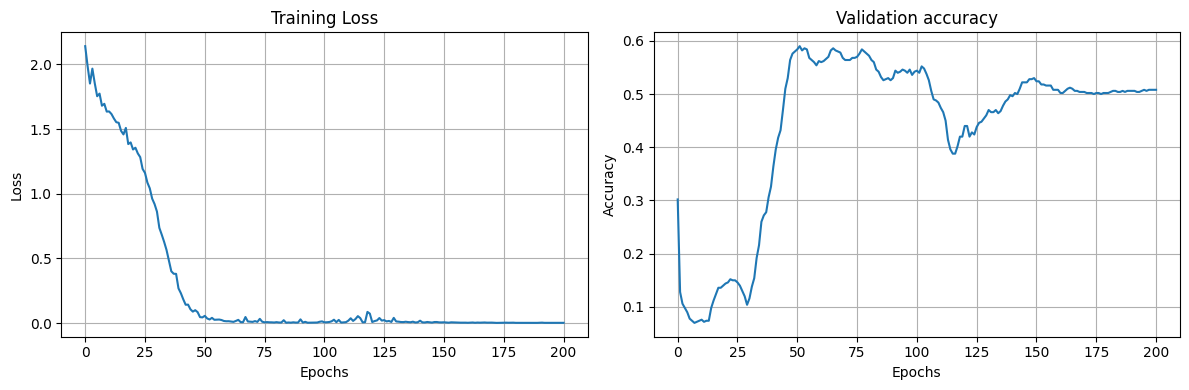

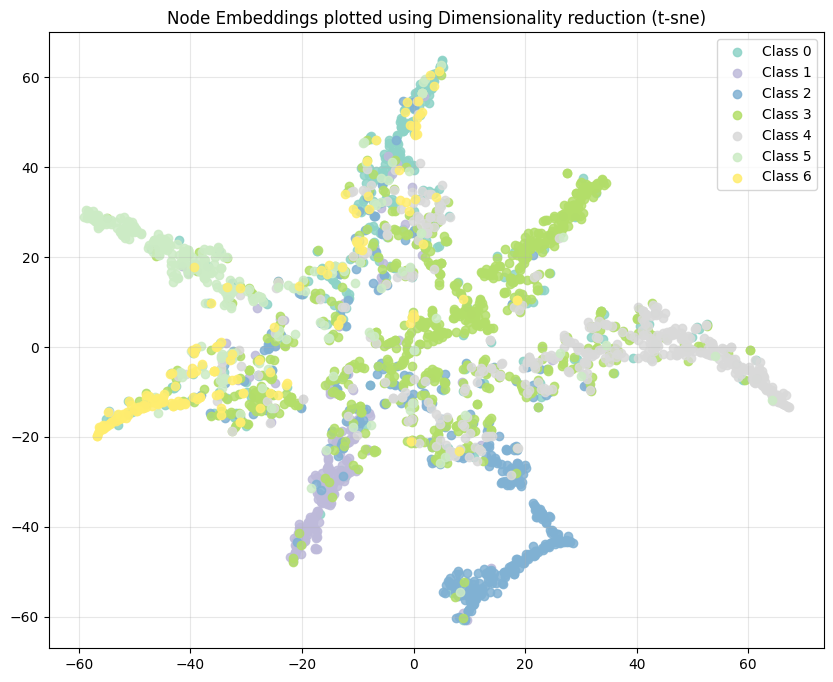

In [13]:
Graph_nn = GraphIsomorphismModel(
    inp_dim = data.x.shape[1], # 1433 features for CORA
    hidden_dim = 256,
    out_dim = num_classes,
    num_layers = 2,
    dropout=0.5
)
print(f"Number of parameter : {sum(p.numel() for p in Graph_nn.parameters())}\n")
print('Model Architecture:')
print(Graph_nn)
print()

Graph_nn, data = Graph_nn.to(device), data.to(device)

Graph_nn, train_loss, val_accuracy = train(Graph_nn, data, epochs = 200)

visualize_results(train_loss, val_accuracy)
visualize_embed(Graph_nn, data, num_classes)

In [14]:
class GIN_torch(nn.Module):
    def __init__(self, inp_dim, hidden_dim, out_dim, num_layers=4, dropout = 0.3):
        super(GIN_torch, self).__init__()
        self.num_layers = num_layers
        self.dropout = dropout
        self.convs = nn.ModuleList()
        self.bn = nn.ModuleList()
        for i in range(num_layers):
            if i == 0:
                lin_layer = mlp(inp_dim, hidden_dim, hidden_dim)
            else:
                lin_layer = mlp(hidden_dim, hidden_dim, hidden_dim)
            self.convs.append(GINConv(lin_layer, eps=0.0, train_eps=True))
            self.bn.append(nn.BatchNorm1d(hidden_dim))
        self.classify = nn.Linear(hidden_dim, out_dim)

    def forward(self, x, edge_index):
        res = None
        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index)
            x = self.bn[i](x)
            x = F.relu(x)
            x = F.dropout(x, self.dropout, training=self.training)
            if res is not None:
                x = x + res
            res = x
        out = self.classify(x)
        return out

Number of parameter : 701961

Model Architecture:
GIN_torch(
  (convs): ModuleList(
    (0): GINConv(nn=mlp(
      (layers): ModuleList(
        (0): Linear(in_features=1433, out_features=256, bias=True)
        (1-2): 2 x Linear(in_features=256, out_features=256, bias=True)
      )
      (bn): ModuleList(
        (0-2): 3 x BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    ))
    (1): GINConv(nn=mlp(
      (layers): ModuleList(
        (0-2): 3 x Linear(in_features=256, out_features=256, bias=True)
      )
      (bn): ModuleList(
        (0-2): 3 x BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    ))
  )
  (bn): ModuleList(
    (0-1): 2 x BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (classify): Linear(in_features=256, out_features=7, bias=True)
)

..Training Model..

Epoch 0/100,  Loss : 2.2624,  Val acc : 0.1340
Epoch 10/100,  Loss : 0.5894,  Val acc : 0.536

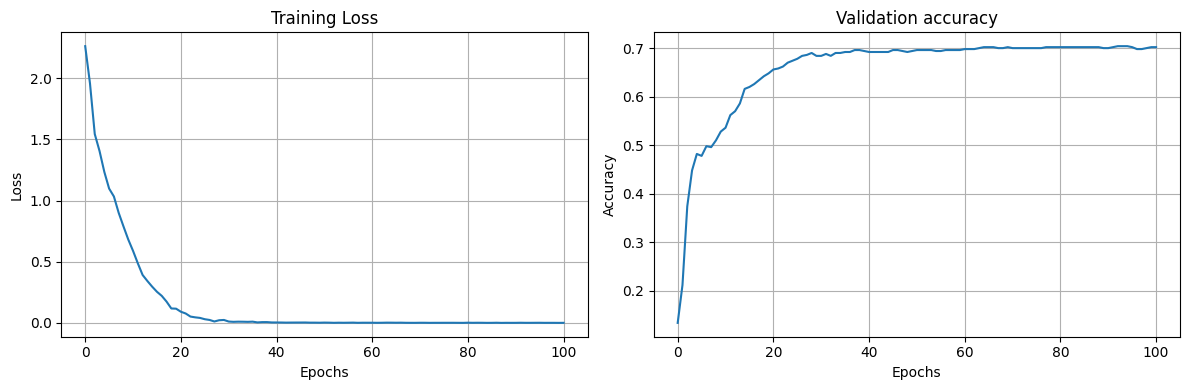

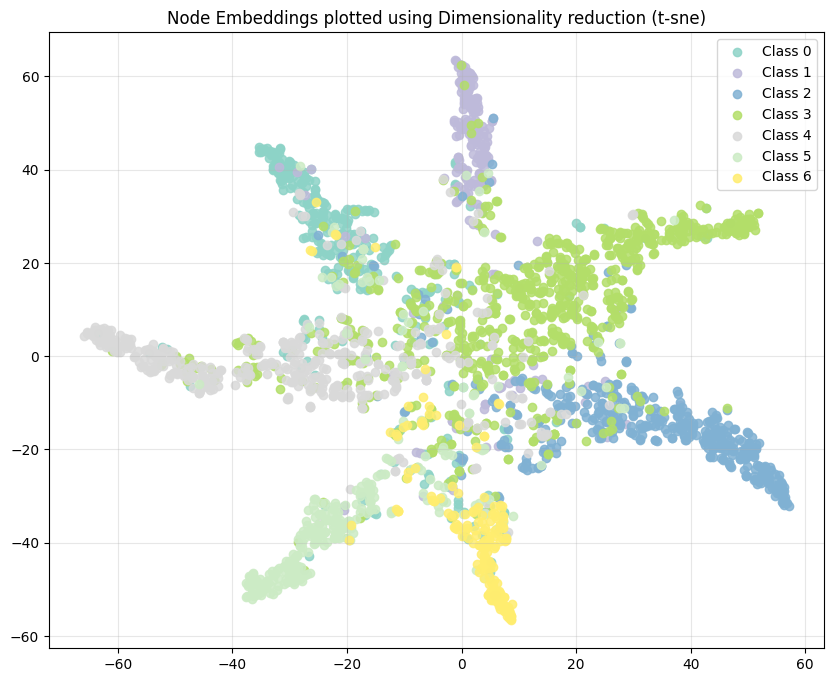

In [15]:
Graph_nn = GIN_torch(
    inp_dim = data.x.shape[1], # 1433 features for CORA
    hidden_dim = 256,
    out_dim = num_classes,
    num_layers = 2,
    dropout = 0.5
)
print(f"Number of parameter : {sum(p.numel() for p in Graph_nn.parameters())}\n")
print('Model Architecture:')
print(Graph_nn)
print()

Graph_nn, data = Graph_nn.to(device), data.to(device)

Graph_nn, train_loss, val_accuracy = train(Graph_nn, data, epochs = 100)

visualize_results(train_loss, val_accuracy)
visualize_embed(Graph_nn, data, num_classes)